<h1>Congreso COMIA-Taller</h1>

###  aplicación de ML a la complejidad económica

<h2> A darle al PCA que es mole de olla-Ingeniería de atributos</h2>

### Vamos a escalar los datos

<H1>PCA</H1>

In [267]:
#cargando base de datos
municipios=pd.read_csv("base_de_datos_municipio.csv")

In [282]:
#parametros
Varianza=.95
#etiquetado de clases
clases=3
#tamaño del conjunto de validacion
tamanio_validacion=0.2
#variable respuesta
variable_a_predecir="eci_2020"

In [283]:
municipios.index=municipios["Code_INEGI"]
prediccion=municipios[variable_a_predecir]
descriptivas=municipios
#quitamos las target
descriptivas=descriptivas.drop(columns=["eci_2015","eci_2016","eci_2017","eci_2018","eci_2019","eci_2020"])
descriptivas_numericos=descriptivas.select_dtypes(include=['float64', 'int'])
prediccion=prediccion.fillna(0)


In [284]:
#imputando el el promedio 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
descriptivas_numericos = imputer.fit_transform(descriptivas_numericos)

### Etiquetando

In [285]:
#reetiquetando en N clases
prediccion_percentiles=[]
if clases==7:
    prediccion_percentiles = pd.qcut(prediccion,7, labels=[1,2,3,4,5,6,7]) 
if  clases==5:
    #reetiquetando en N clases
    prediccion_percentiles = pd.qcut(prediccion,5, labels=[1,2,3,4,5]) 
if clases==3:
    #reetiquetando en N clases
    prediccion_percentiles = pd.qcut(prediccion,3, labels=[1,2,3]) 
            

In [286]:
 prediccion_percentiles

Code_INEGI
1001     3
1002     2
1003     3
1004     2
1010     2
        ..
32052    2
32053    2
32054    2
32055    3
32056    3
Name: eci_2020, Length: 2469, dtype: category
Categories (3, int64): [1 < 2 < 3]

### Dividiendo conjuntos en Entrenamiento y Validación

In [287]:
# a dos componentes
#dividimos el conjunto en 2 sets(entrenamiento y prueba)

entrenamiento, validacion, entrenamiento_lbl, validacion_lbl = train_test_split(
    descriptivas_numericos, prediccion_percentiles, test_size=tamanio_validacion, random_state=0)


In [288]:
entrenamiento.shape
validacion.shape
entrenamiento_lbl.shape
validacion_lbl.shape

(494,)

In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(entrenamiento)


entrenamiento = scaler.transform(entrenamiento)
validacion = scaler.transform(validacion)

In [290]:
entrenamiento

array([[-0.57740328, -0.57045166, -0.07341546, ..., -0.6855851 ,
        -0.47001665, -0.53946189],
       [ 1.16874814,  1.18465275,  1.25933759, ...,  2.06414036,
        -0.33386866, -0.33037736],
       [-0.04453068, -0.03041953, -0.39231764, ...,  0.39039443,
         1.3313867 ,  1.53761441],
       ...,
       [-0.57066658, -0.57045166, -0.45253423, ..., -0.6855851 ,
        -0.47001665, -0.53946189],
       [-0.44293884, -0.43544363,  0.64734034, ...,  0.15128787,
        -0.39175838, -0.48302606],
       [ 0.2343685 ,  0.23959653, -0.14039106, ..., -0.77525006,
        -0.44175754, -0.52934763]])

In [291]:
#PCA con regresion logistica
from sklearn.decomposition import PCA
pca = PCA(Varianza)

In [292]:
pca.fit(entrenamiento)

PCA(n_components=0.95)

In [293]:
#componentes que describen el 95% de la varianza
pca.n_components_

77

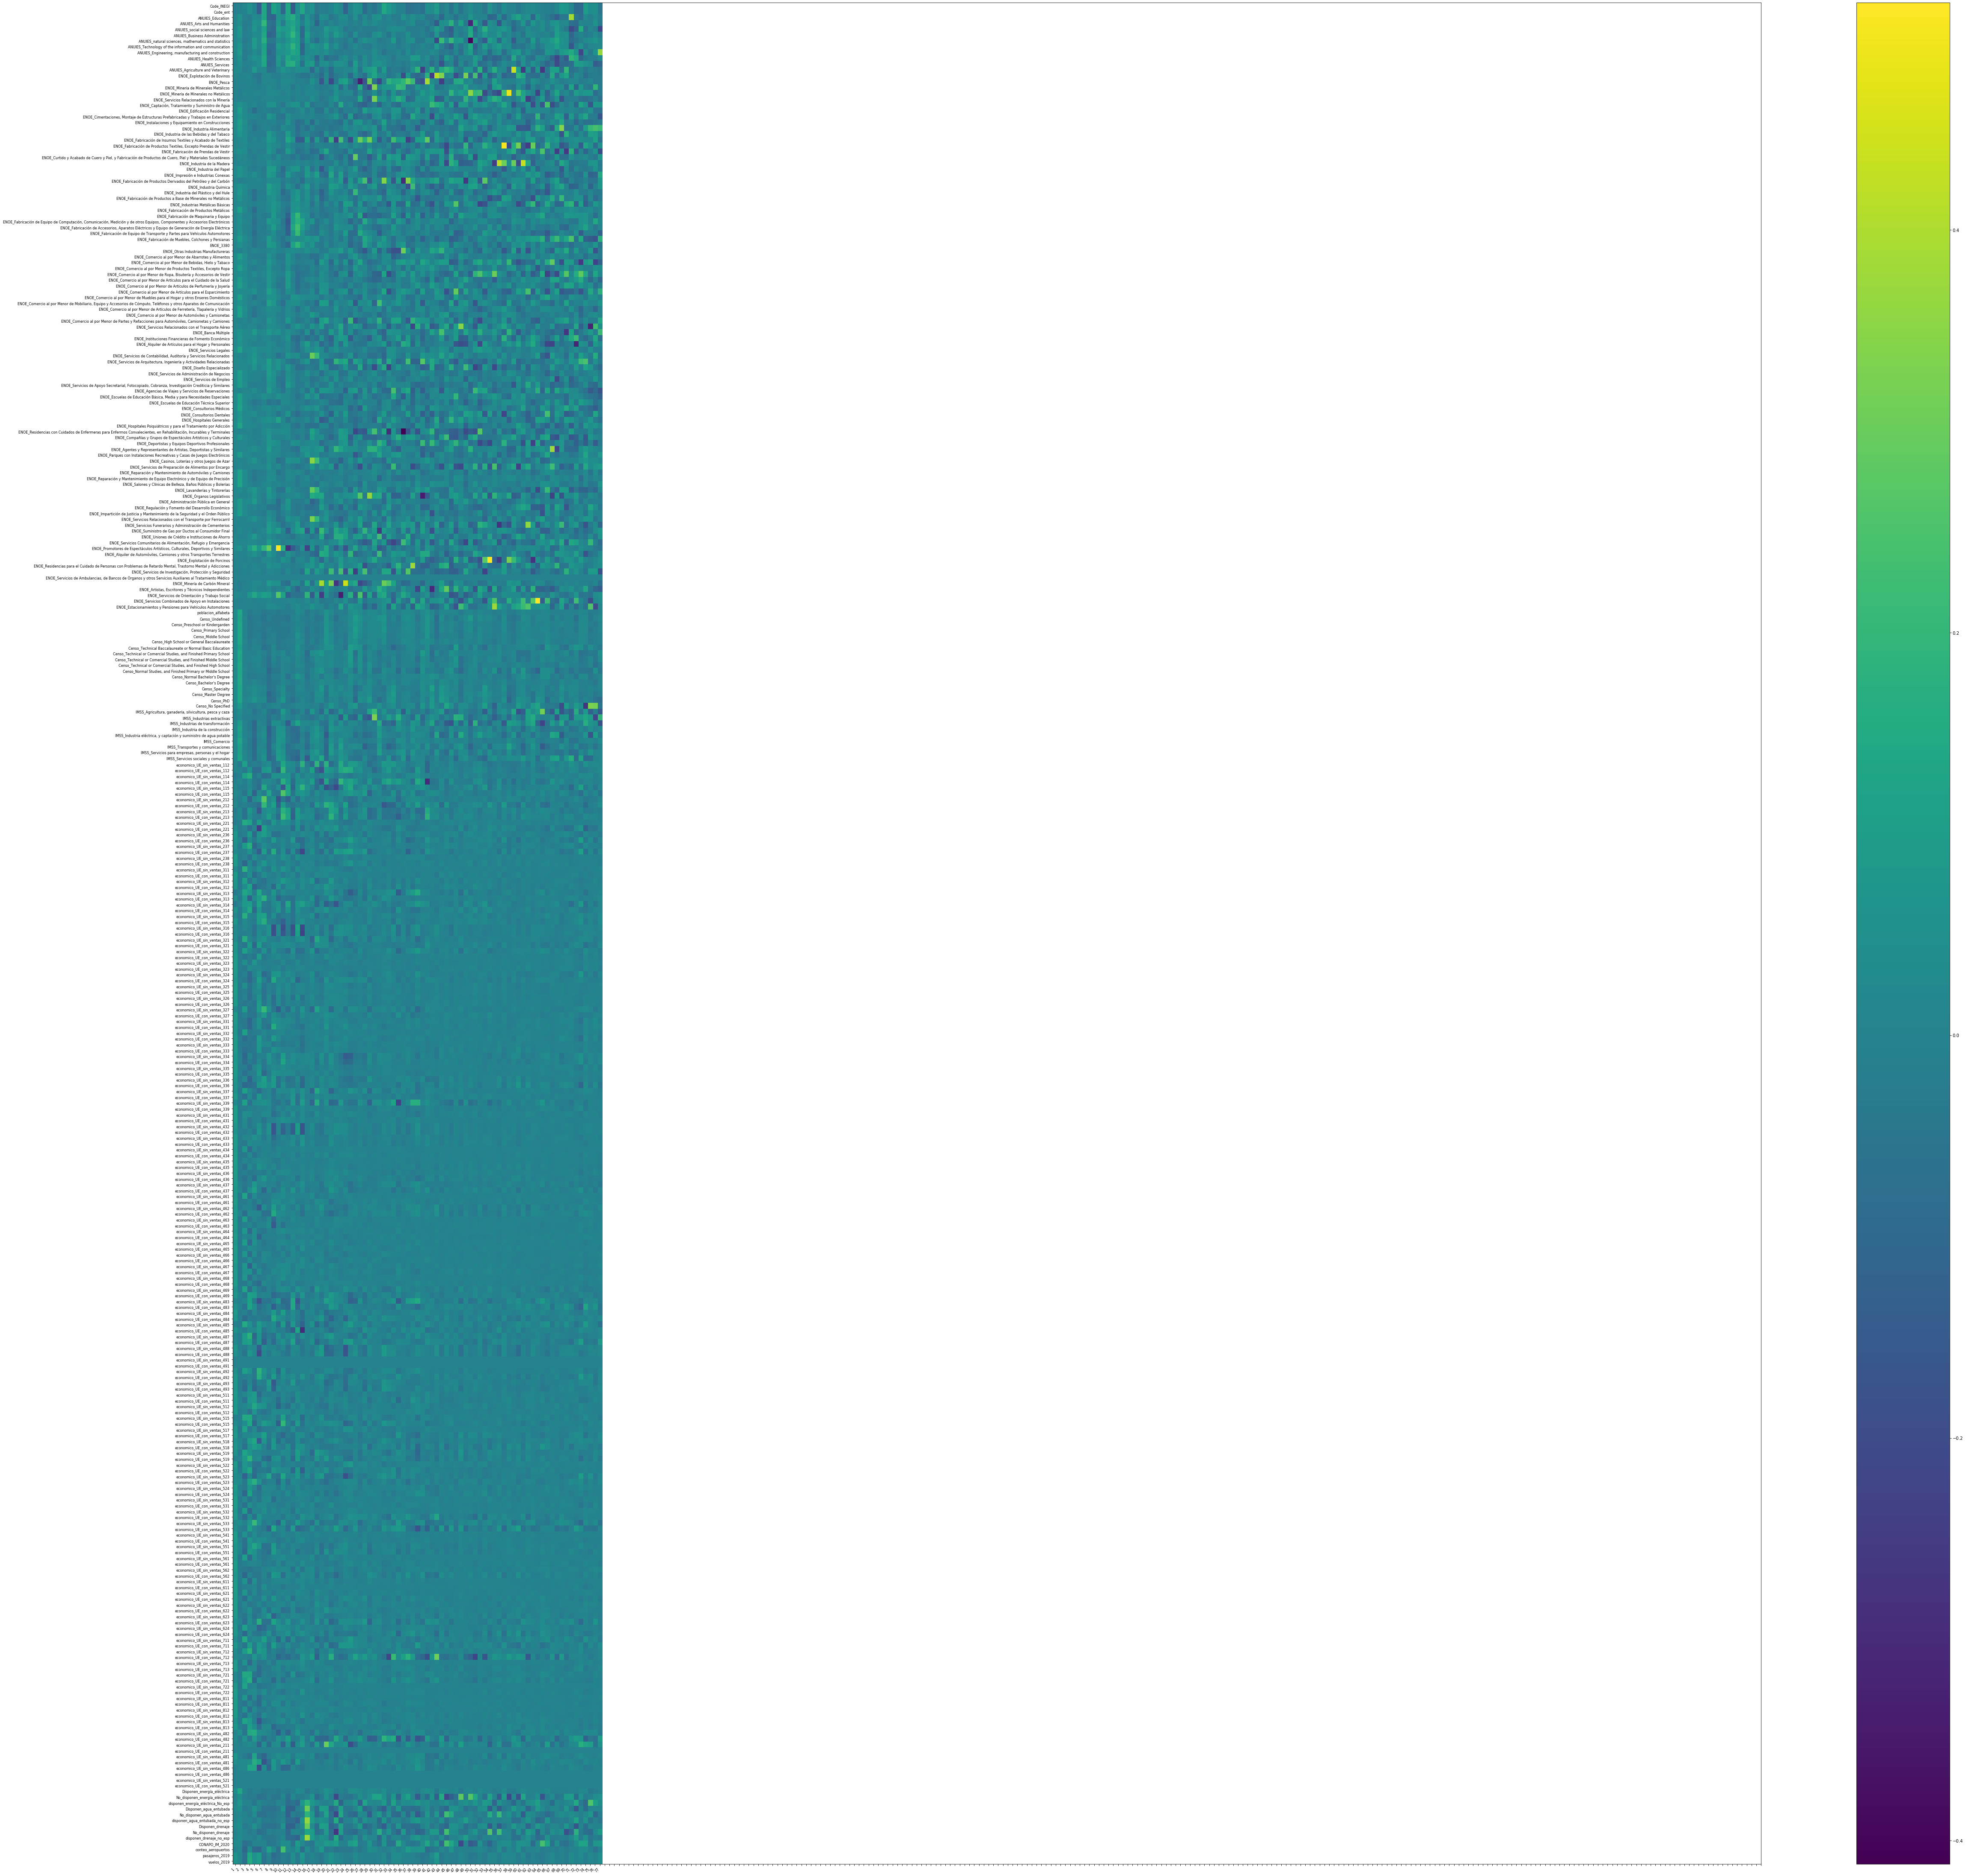

In [337]:
# graficando

# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(80, 80))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(descriptivas.columns)), descriptivas.columns)
plt.xticks(range(len(descriptivas.columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 8)
plt.savefig('componentes_principales.png')

In [294]:
#los datos son continuos y necesitamos codificarlos
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

entrenamiento_lbl_encoded = lab_enc.fit_transform(entrenamiento_lbl)
validacion_lbl_encoded = lab_enc.fit_transform(validacion_lbl)

In [295]:
 entrenamiento_lbl_encoded

array([2, 0, 0, ..., 1, 1, 1])

In [296]:

#coeficientes
entrenamiento = pca.transform(entrenamiento)
validacion = pca.transform(validacion)

In [297]:

#Ahora usaremos regresion logistica
from sklearn.linear_model import LogisticRegression
# solver = 'lbfgs' métodos de optimización quasi-Newton 
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=1000)

In [298]:
#Entrenando el modelo
logisticRegr.fit(entrenamiento, entrenamiento_lbl_encoded)

LogisticRegression(max_iter=1000)

In [299]:
predic=logisticRegr.predict(validacion)

In [300]:
#prediccion
logisticRegr.predict(validacion)

array([1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 2,
       0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0,
       1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1,
       0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2,

In [302]:
#ahora el performance
score = logisticRegr.score(validacion, validacion_lbl_encoded)
print(score)

0.7955465587044535


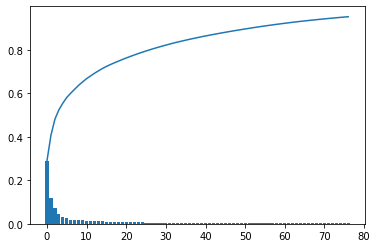

In [303]:
varianza = pca.explained_variance_ratio_
var_acum= np.cumsum(varianza)
plt.bar(range(len(varianza)), varianza)
plt.plot(range(len(varianza)), var_acum)
plt.show()

In [304]:
explained_variance = pca.explained_variance_ratio_
np.cumsum(explained_variance)

array([0.29053912, 0.4071688 , 0.48075079, 0.52373528, 0.5542926 ,
       0.5806662 , 0.60038083, 0.61865717, 0.63656567, 0.65206989,
       0.66694287, 0.67952782, 0.6917044 , 0.70285934, 0.71356637,
       0.72307147, 0.73157959, 0.73957971, 0.74721087, 0.75457781,
       0.76175975, 0.76875528, 0.7754293 , 0.78184391, 0.78808745,
       0.79404798, 0.79977835, 0.805419  , 0.81077027, 0.81595444,
       0.82101665, 0.8258977 , 0.830655  , 0.83514797, 0.83942885,
       0.84364141, 0.84773718, 0.85168418, 0.85555383, 0.85940598,
       0.86300473, 0.86652714, 0.86998621, 0.87336868, 0.87668247,
       0.87992124, 0.88313629, 0.88624141, 0.88924327, 0.89221818,
       0.89513684, 0.8980099 , 0.90087072, 0.90367235, 0.90642954,
       0.90902125, 0.91155586, 0.91405776, 0.91654914, 0.91892091,
       0.92126792, 0.92357056, 0.92578551, 0.92797266, 0.93009584,
       0.93206416, 0.93400136, 0.93592725, 0.93780914, 0.93965623,
       0.94144911, 0.94320864, 0.94495722, 0.94661585, 0.94826

<h1>Otros Modelos</H1>

In [27]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [305]:
#ya sabemos que queremos 72 componentes
pca = PCA(n_components=77,whiten=True)
descriptivas = scaler.transform(descriptivas_numericos)
prediccion_lbl_encoded = lab_enc.fit_transform(prediccion_percentiles)
pca = pca.fit(descriptivas)
dataPCA = pca.transform(descriptivas)

In [306]:
dataPCA.shape

(2469, 77)

In [307]:
def Probando_modelos(datos,etiquetas ):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, datos, etiquetas, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor()
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor()
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR(kernel='rbf')
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results=results.sort_values("R Square Score",ascending=False)
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0,1])
    return results
#Probando sin PCA




In [31]:
#PROBANDO SIN PCA-NO TERMINA DE CORRER XD
#Probando_modelos(descriptivas_numericos,prediccion_percentiles)

R Square Score
SVM RBF               0.691584
RandomForest          0.659874
Bagging               0.625492
AdaBoost              0.490191
Bayesian Ridge        0.398490
Lasso                 0.338276
Ridge                 0.335973
Linear                0.334418
SVM Linear            0.269360
Hubber                0.258868

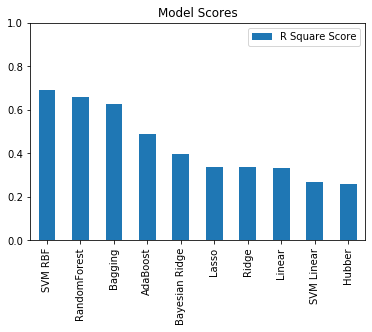

In [308]:
#AHORA CON PCA
#dataPCA = pca.transform(entrenamiento)
Probando_modelos(dataPCA ,prediccion_lbl_encoded )

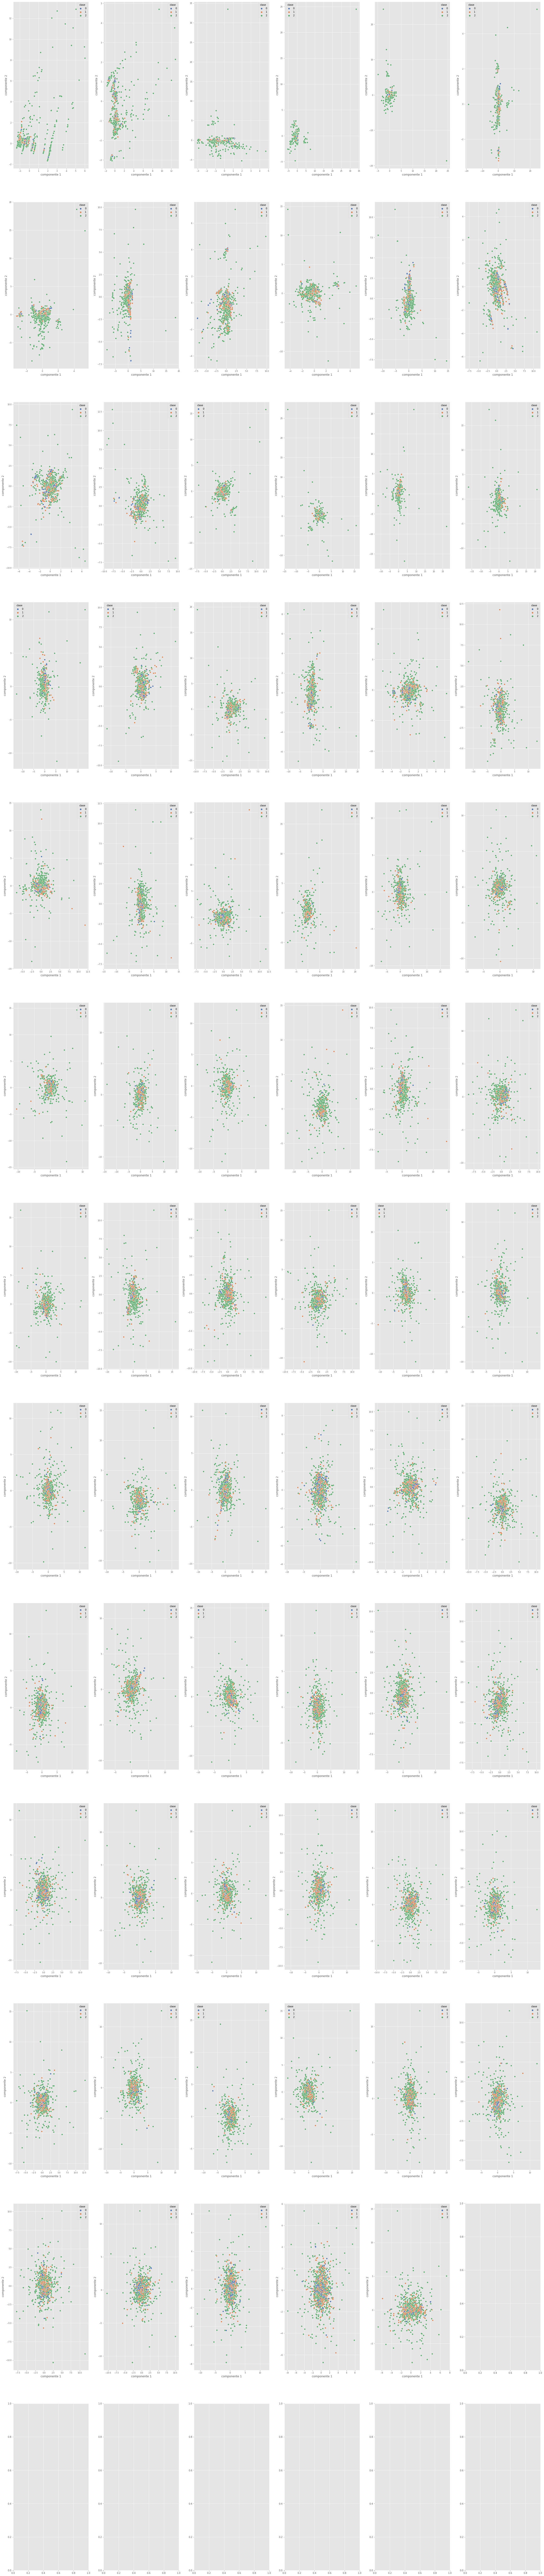

In [183]:
import matplotlib.cm as cm
dpca=pd.DataFrame(dataPCA)

fig, axes = plt.subplots(nrows=int(pca.n_components_/6)+1, ncols=6, figsize=(40,200))
axes = axes.flat

for i in range(0,pca.n_components_-1 ):
    #print(i)
    comp=pd.DataFrame()
    comp["componente 1"]=dpca[i]
    comp["componente 2"]=dpca[i+1]
    comp["clase"]=prediccion_lbl_encoded
    sns.scatterplot(
        x           = "componente 1",
        y           = "componente 2",
        palette="deep",
        data=comp,
        hue="clase",
        ax          = axes[i]
    )

    axes[i].tick_params(labelsize = 8)
  

<h1>Entonces ¿Cuáles son las componentes que aportaron mas?</h1>

In [309]:
# Numero de componentes
n_pcs= pca.components_.shape[0]

# LIST COMPREHENSION HERE
mas_importantes= [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
descriptivas=municipios
#quitamos las target
descriptivas=descriptivas.drop(columns=["eci_2015","eci_2016","eci_2017","eci_2018","eci_2019","eci_2020"])
descriptivas=descriptivas.select_dtypes(include=['float64', 'int'])
nombres_iniciales =descriptivas.columns
# obtener nombres
nombres_mas_importantes = [nombres_iniciales[mas_importantes[i]] for i in range(n_pcs)]


dic = {'PC{}'.format(i): nombres_mas_importantes[i] for i in range(n_pcs)}

#Dataframe
df = pd.DataFrame(dic.items())
df.to_csv("Columnas_mas_importantes.csv")

<h1>Ahora juguemos con una RNA</h1>

In [313]:

import tensorflow.compat.v1  as tf
import tflearn

entrenamiento_rna, validacion_rna, entrenamiento_lbl_rna, validacion_lbl_rna= train_test_split(
    dataPCA ,prediccion_lbl_encoded , test_size=.2, random_state=42)



In [314]:
entrenamiento_lbl_rna

array([0, 1, 2, ..., 0, 0, 2])

In [315]:
entrenamiento_lbl_rna =[i for i in entrenamiento_lbl_rna]
validacion_lbl_rna =[i for i in validacion_lbl_rna]

entrenamiento_lbl_rna = np.reshape(entrenamiento_lbl_rna , (-1, 1))
validacion_lbl_rna= np.reshape(validacion_lbl_rna , (-1, 1))

In [319]:
#"ProximalAdaGrad","sgd",'RMSProp','AdaGrad',"ProximalAdaGrad" "momentum","momentum",'RMSProp' " "momentum"
optimizadores=["AdaDelta",'RMSProp','AdaGrad',"ProximalAdaGrad"]
# "linear" ,'tanh'
tf.reset_default_graph()
activator=[  "linear" ,'tanh' ]
tamanio=[[1000,1000,1],[100,100],[35,35]]
#t#amanio=[[64,64,30,10]]
#sgd = tflearn.SGD(learning_rate=0.01,lr_decay=0.96 , decay_step=500)
resultados=[]
for o in optimizadores:
    for a in activator:
        for t in tamanio:
            
            print(o)
            print(a)
            print(str(t[0]))
            tf.reset_default_graph()
            net = tflearn.input_data(shape=[None, 77])
   
            net = tflearn.fully_connected(net,t[0], activation=a,regularizer="L2", weights_init='normal', weight_decay=0.001)
            #net = tflearn.dropout(net, 0.5)
            net = tflearn.fully_connected(net,t[1], activation=a,regularizer="L2", weights_init='normal', weight_decay=0.001)

            net = tflearn.fully_connected(net,1, activation=a,regularizer="L2", weights_init='normal', weight_decay=0.001)
            net = tflearn.regression(net, optimizer=o,loss="categorical_crossentropy",metric="accuracy")
            model = tflearn.DNN(net)
            model.fit(entrenamiento_rna, entrenamiento_lbl_rna,show_metric=True,validation_set=0.2,n_epoch=30,batch_size=len(entrenamiento_rna))
            accu=model.evaluate(validacion_rna, validacion_lbl_rna)
            
            #print(accu)
            config=[o,a,t[0],accu]
            print(config)
            resultados.append(config)

AdaDelta
linear
1000
---------------------------------
Run id: 7MKZ4Z
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name BinaryAccuracy/ (raw) is illegal; using BinaryAccuracy/__raw_ instead.
---------------------------------
Training samples: 1580
Validation samples: 395
--
Training Step: 1  | time: 1.193s
| AdaDelta | epoch: 001 | loss: 0.00000 - binary_acc: 0.0000 | val_loss: 0.00000 - val_binary_acc: 0.2886 -- iter: 1580/1580
--
Training Step: 2  | time: 1.091s
| AdaDelta | epoch: 002 | loss: 0.00000 - binary_acc: 0.2871 | val_loss: 0.00000 - val_binary_acc: 0.2886 -- iter: 1580/1580
--
Training Step: 3  | time: 1.091s
| AdaDelta | epoch: 003 | loss: 0.00000 - binary_acc: 0.2821 | val_loss: 0.00000 - val_binary_acc: 0.2886 -- iter: 1580/1580
--
Training Step: 4  | time: 1.091s
| AdaDelta | epoch: 004 | loss: 0.00000 - binary_acc: 0.3164 | val_loss: 0.00000 - val_binary_acc: 0.2886 -- iter: 1580/1580
--
Training Step: 5  | time: 1.118s
| AdaDelta | epoch: 005 | loss: 0.0

In [339]:
resultados=pd.DataFrame(resultados)
a=resultados[3]
accu=[i[0] for i in a]
resultados["accu"]=accu

resultados=resultados.sort_values(by="accu",ascending=False)
resultados.to_csv("resultados_rna_parte_a.csv")